<a target="_blank" href="https://colab.research.google.com/github/ccaudek/ds4psy_2023/blob/main/040_intro_seaborn.ipynb">
  <img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/>
</a>

(intro-seaborn-notebook)=
# Seaborn

### Ampliare le possibilità di visualizzazione dei dati con Seaborn

Nel capitolo precedente, abbiamo esplorato le potenzialità di Matplotlib, una delle librerie più versatile per la visualizzazione dei dati in Python. Tuttavia, se desiderate portare le vostre visualizzazioni a un livello superiore con una maggiore facilità d'uso, Seaborn è la risposta. Pensata come un'estensione di Matplotlib, Seaborn offre una vasta gamma di opzioni di visualizzazione specificamente progettate per rispondere alle esigenze della data science.

Seaborn non solo migliora l'estetica dei grafici, ma semplifica anche la creazione di visualizzazioni complesse, rendendo l'intero processo più intuitivo. Dalle mappe di calore ai grafici a violino, la libreria offre una grande varietà di metodi per esplorare e presentare i dati.

Per chi è interessato a esplorare più a fondo le funzionalità di Seaborn, i tutorial disponibili sulla [pagina web ufficiale di Seaborn](https://seaborn.pydata.org/) rappresentano una risorsa molto utile. 

Esaminiamo qui alcuni esempi.

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
import arviz as az
import warnings

warnings.filterwarnings("ignore", category=UserWarning)
warnings.filterwarnings("ignore", category=FutureWarning)

Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.


In [2]:
%config InlineBackend.figure_format = 'retina'

RANDOM_SEED = 42
rng = np.random.default_rng(RANDOM_SEED)

az.style.use("arviz-grayscale")
plt.rcParams['figure.dpi'] = 300

Consideriamo nuovamente i dati Palmer penguin.

In [3]:
df = pd.read_csv("../data/penguins.csv")

## Visualizzare la distribuzione dei dati

Una delle forme di visualizzazione più comuni e informative nel campo dell'analisi dei dati è l'istogramma, e la sua variante più sofisticata, l'istogramma lisciato. Vediamo dunque come generare istogrammi che, per il DataFrame `df`, sono stratificati sia in base alla specie che al genere dei pinguini.

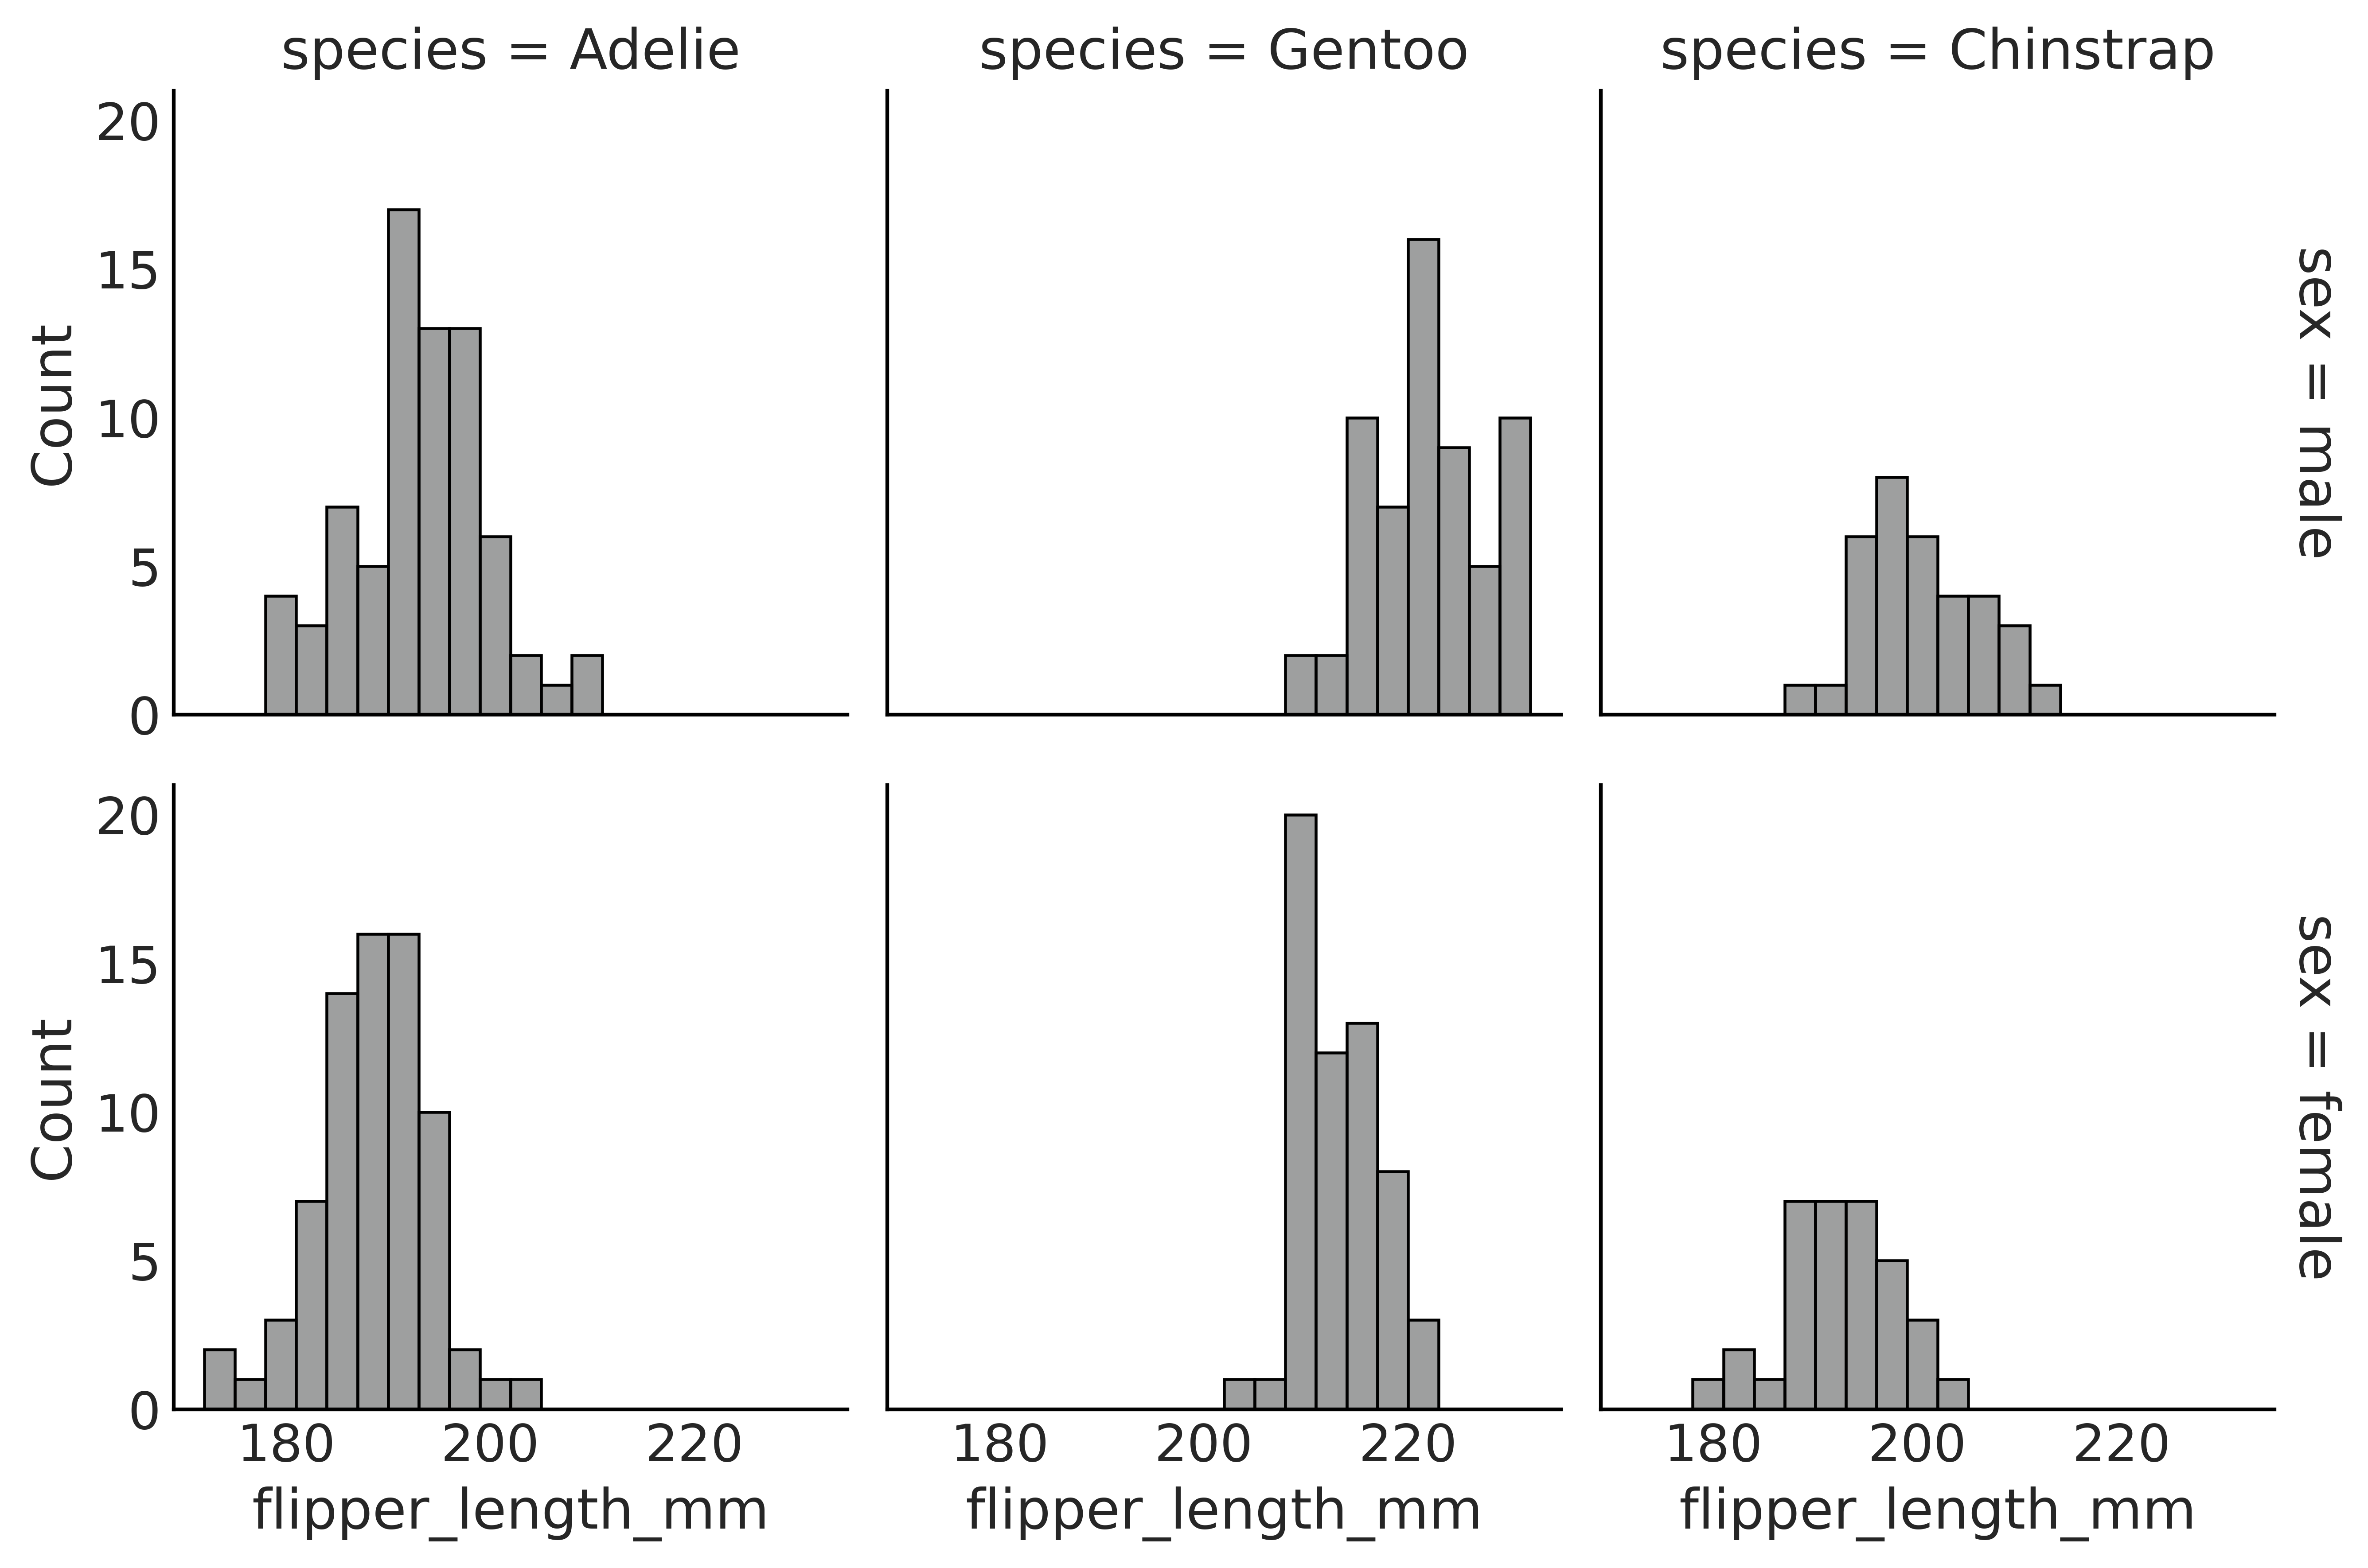

In [4]:
sns.displot(
    df, x="flipper_length_mm", col="species", row="sex", color="C2",
    binwidth=3, height=3, facet_kws=dict(margin_titles=True),
);

Generiamo la stessa figura usando questa volta gli istogrammi lisciati.

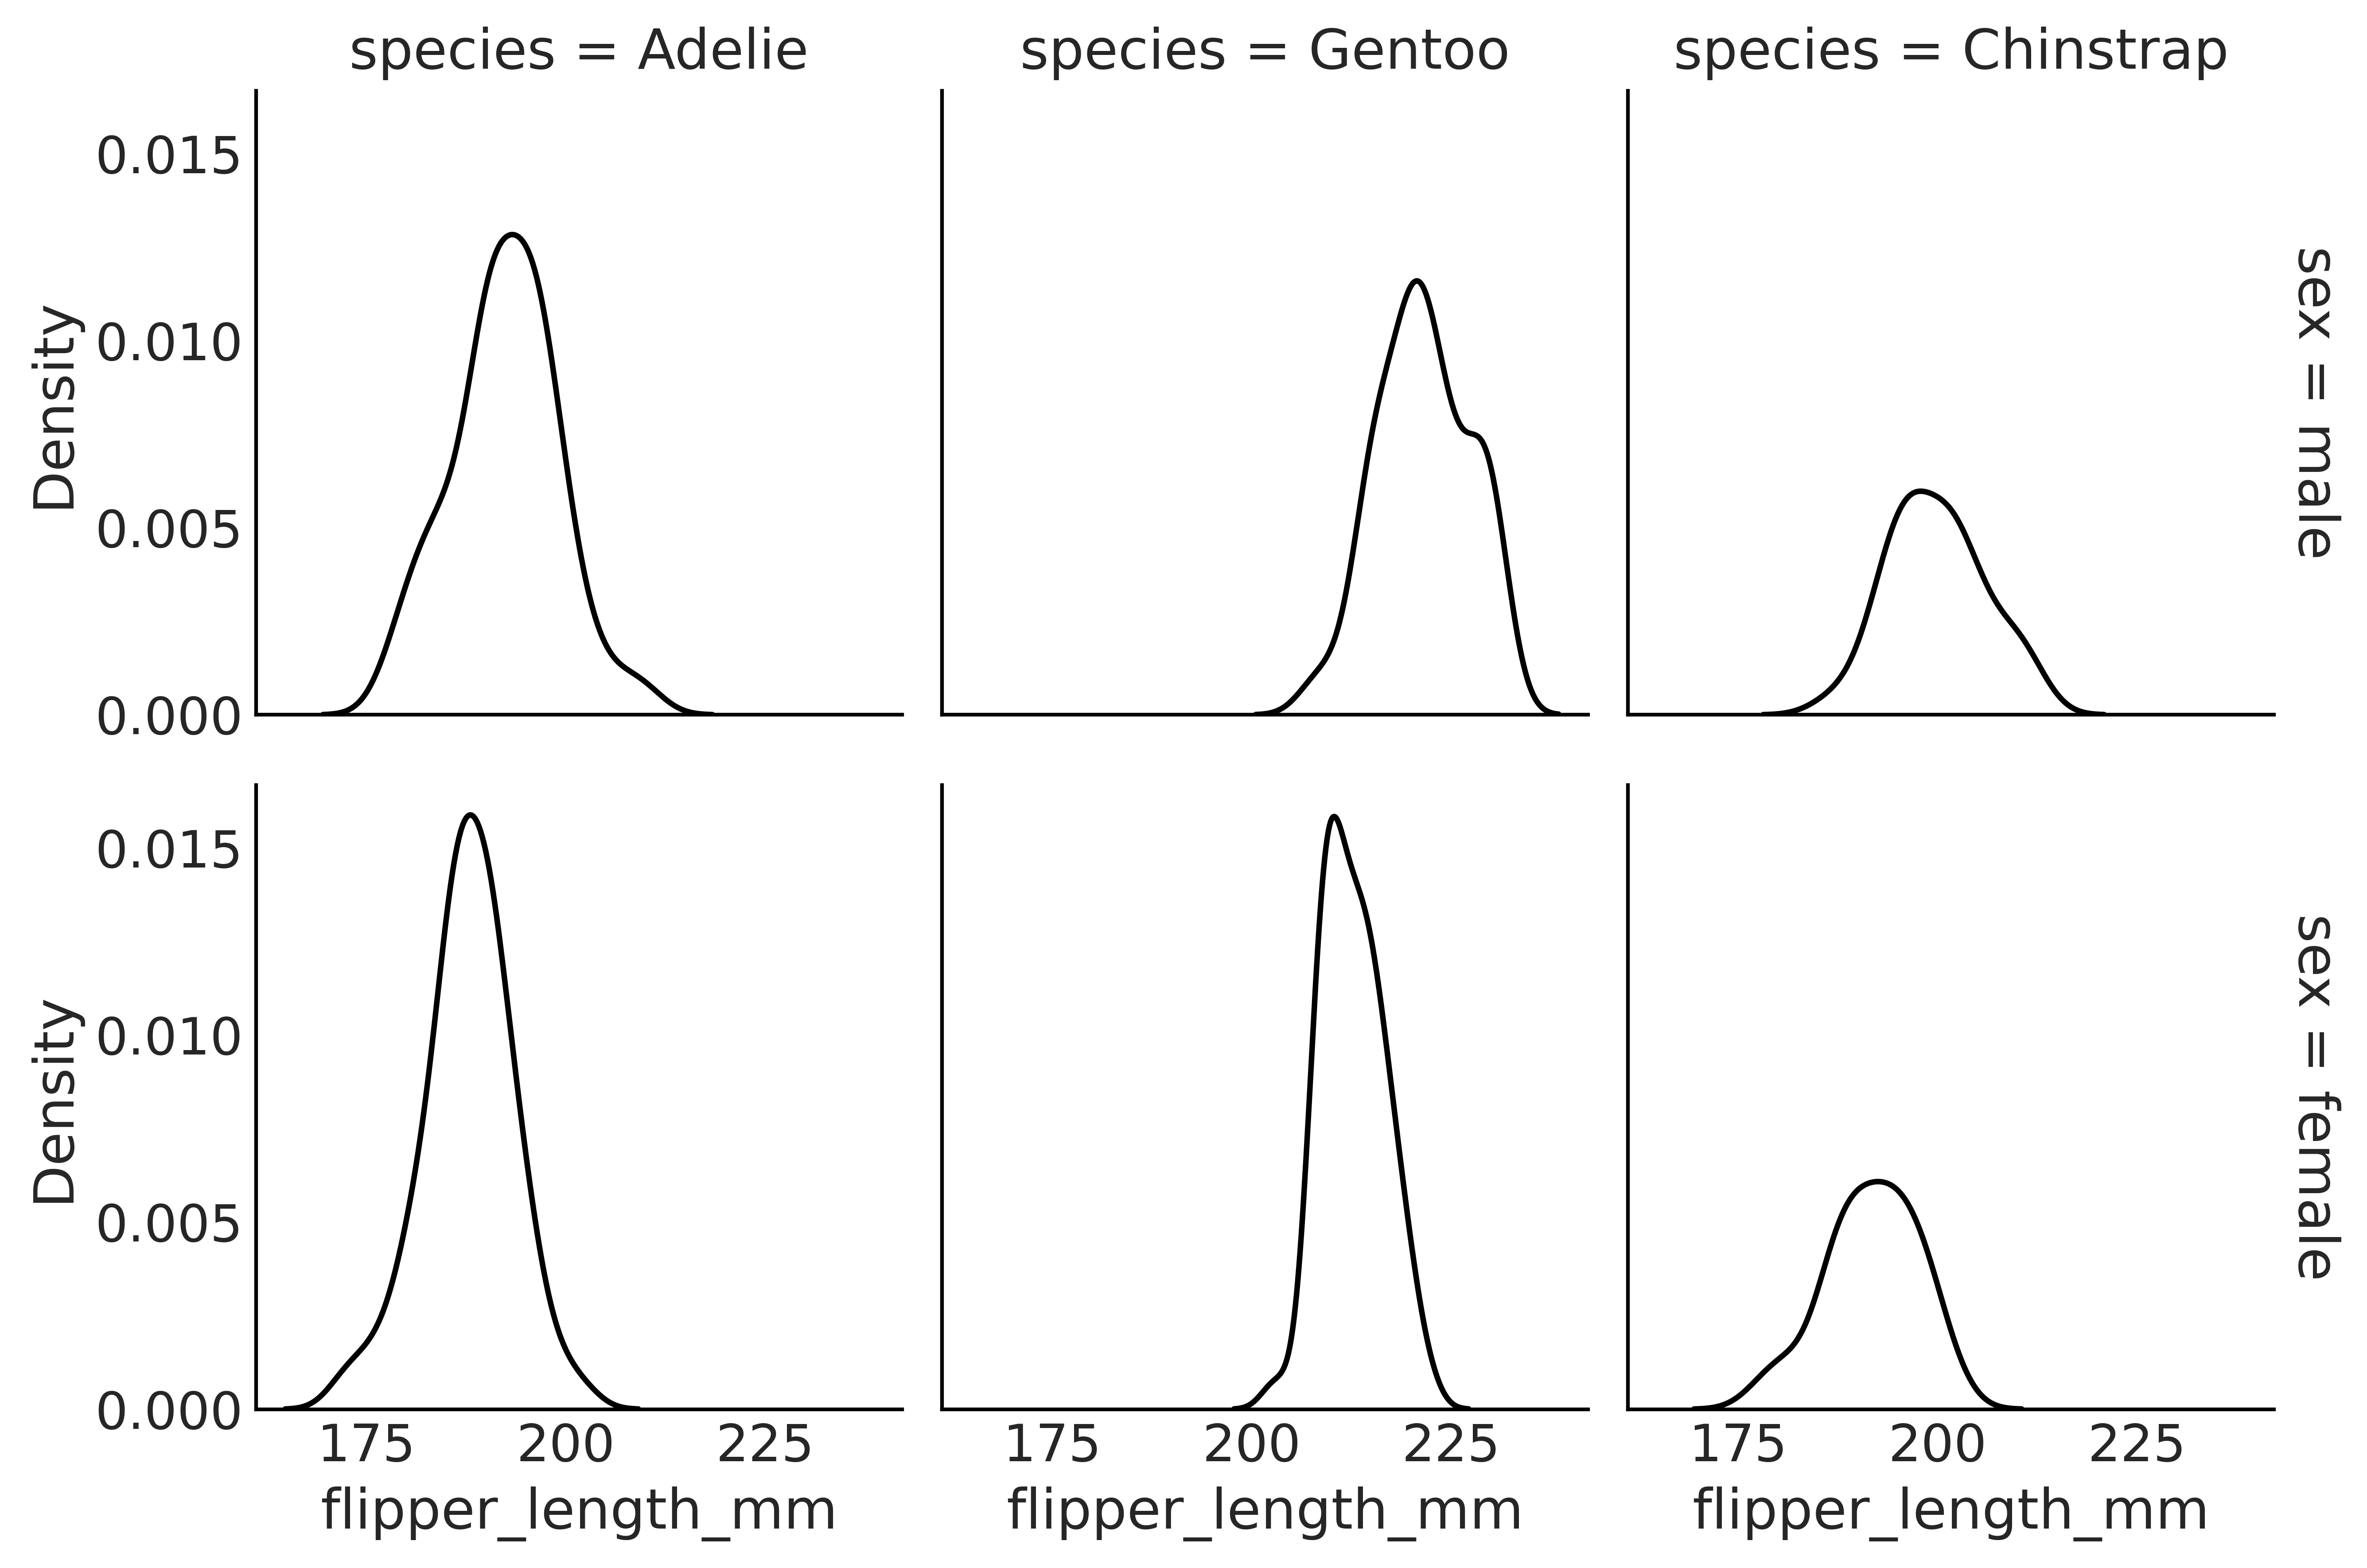

In [5]:
sns.displot(
    df, x="flipper_length_mm", col="species", row="sex",
    height=3, kind="kde", facet_kws=dict(margin_titles=True),
);

## Visualizzazione di dati categoriali

Consideriamo ora il caso in cui si vuole rappresentare la relazione tra una variabile numerica e una o più variabili categoriali. 

Consideriamo, ad esempio, la massa corporea in relazione alla specie, differenziando le osservazioni per genere. Creiamo il grafico utilizzando i boxplot.

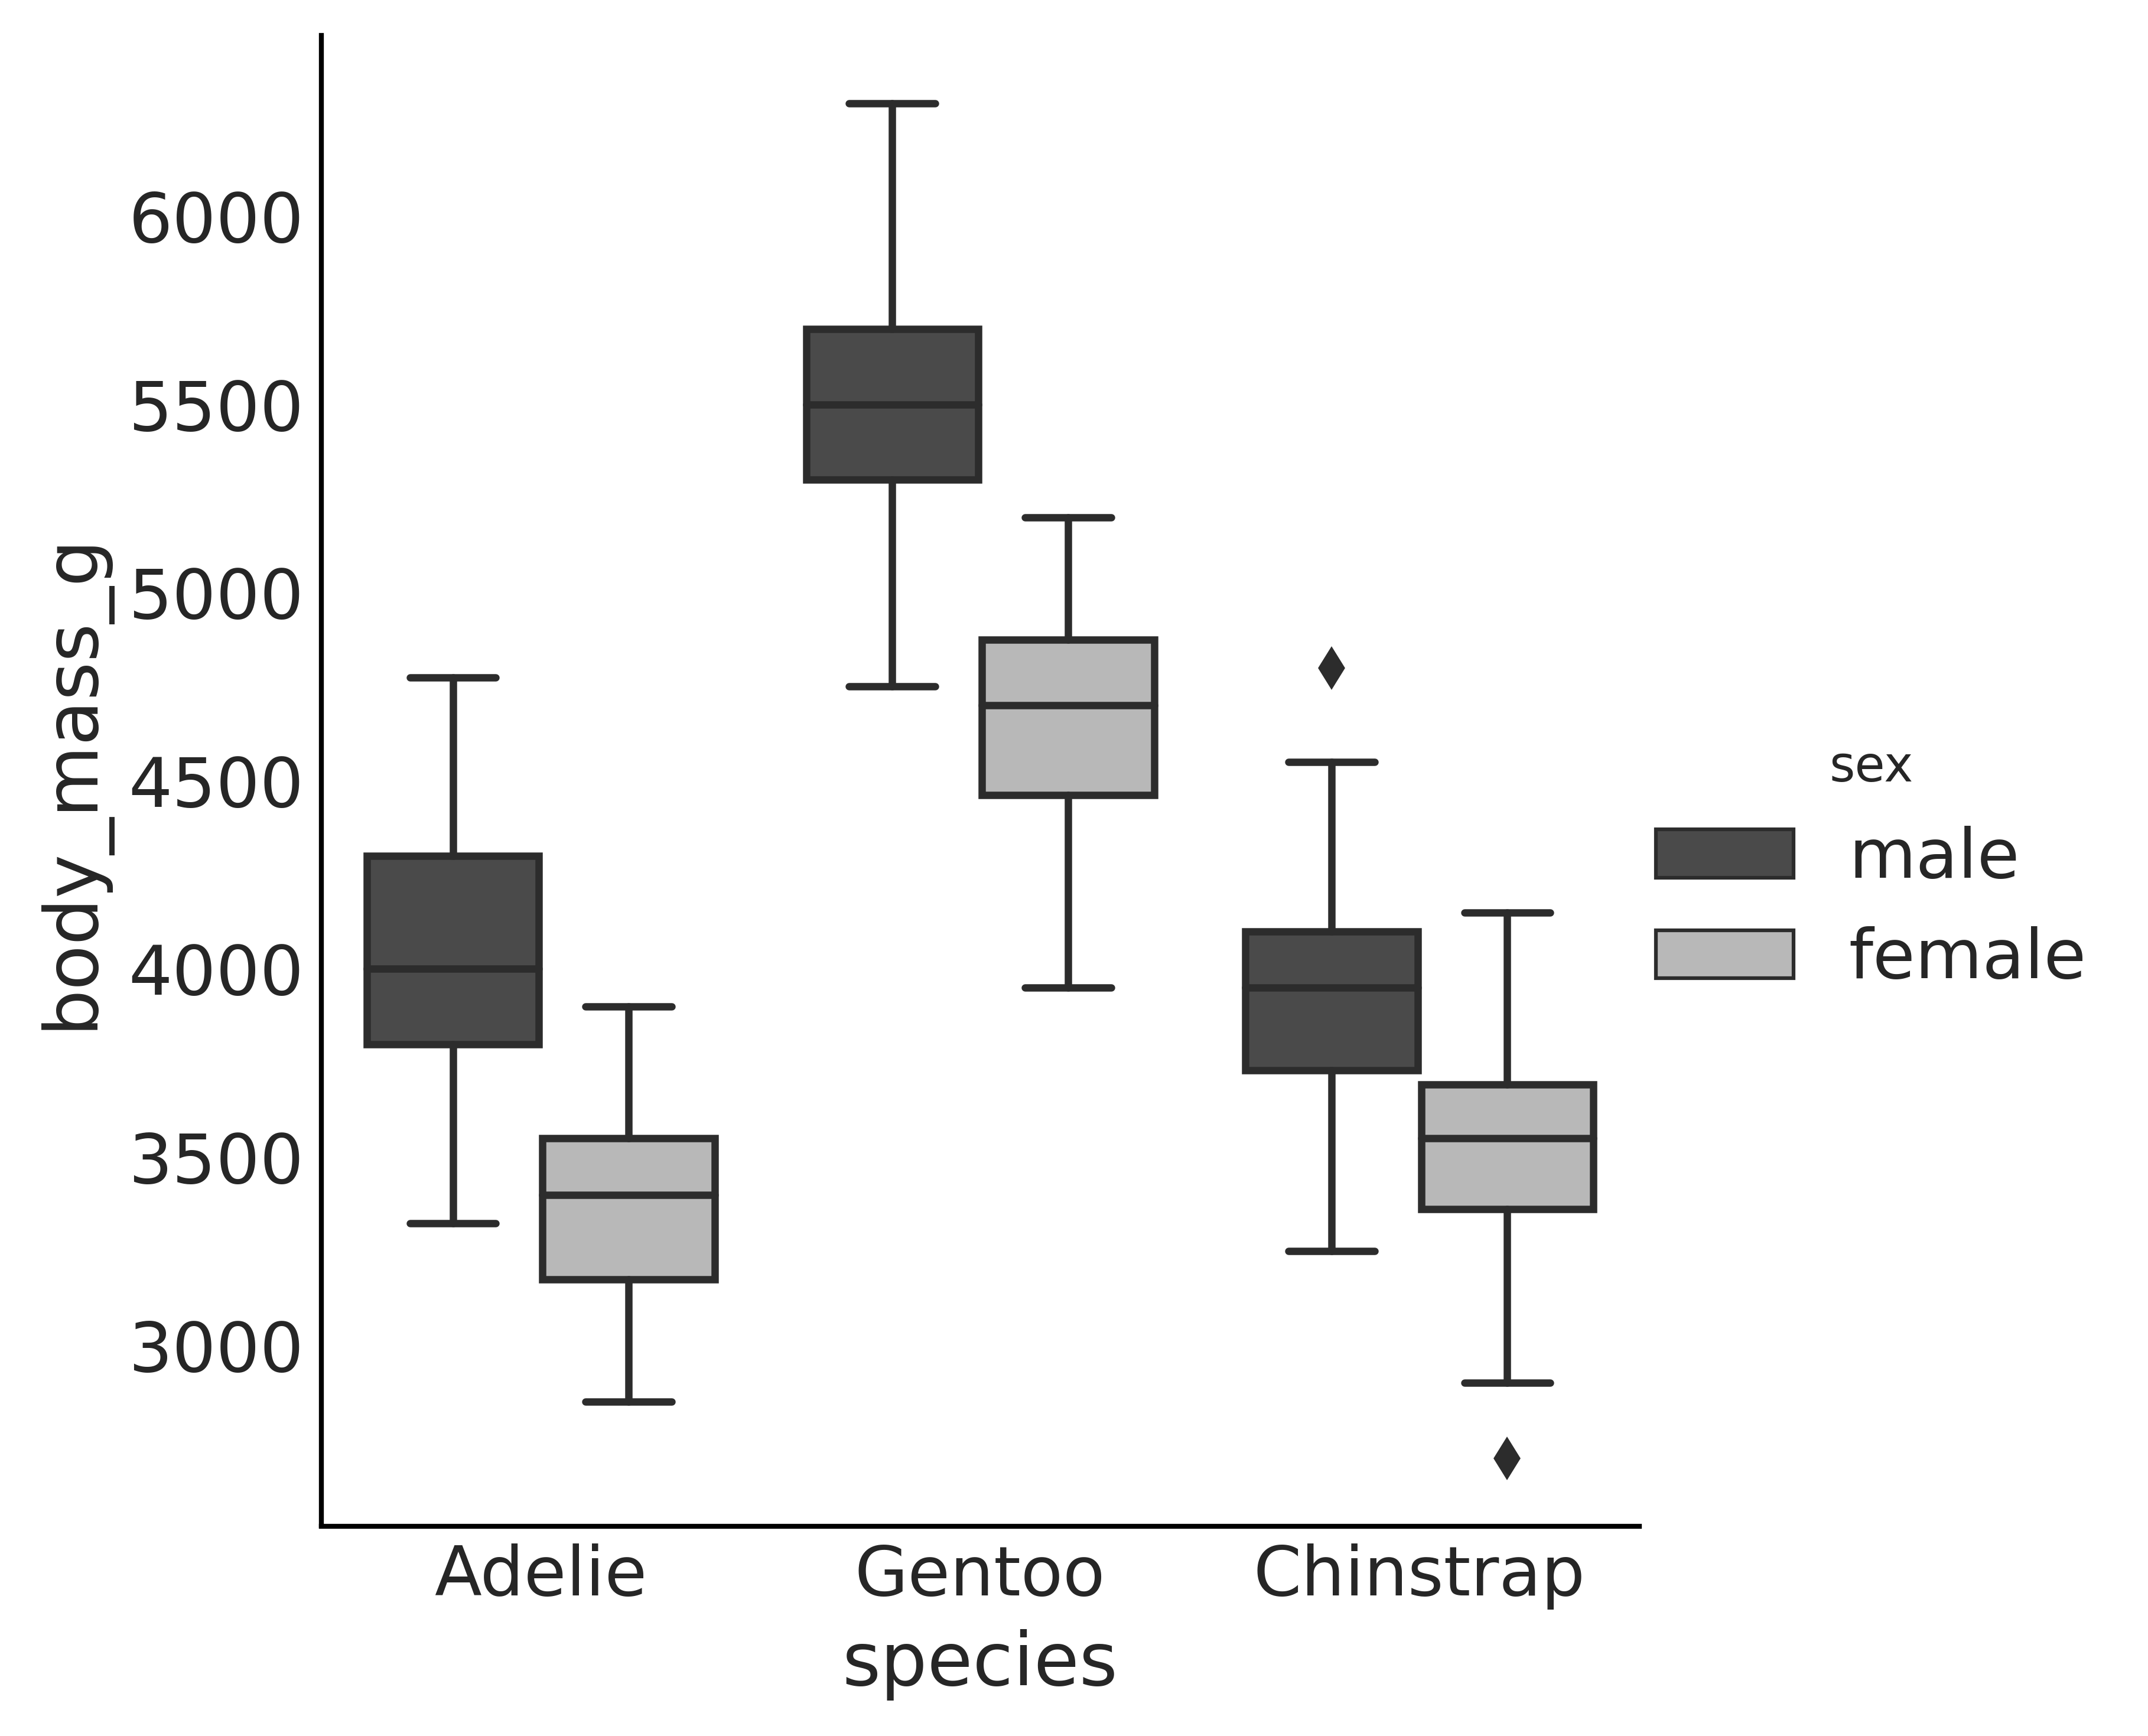

In [6]:
# Create a custom color palette
palette = {'male': 'C1', 'female': 'C3'}  
sns.catplot(df, x="species", y="body_mass_g", hue="sex", kind="box", palette=palette);

Dai diagrammi risulta evidente che i pinguini maschi hanno un peso maggiore rispetto alle femmine in tutte le specie, e che i pinguini Gentoo hanno un peso superiore rispetto ad Adelie e Chinstrap.

Come alternativa, possiamo utilizzare il violinplot per la rappresentazione grafica dei dati.

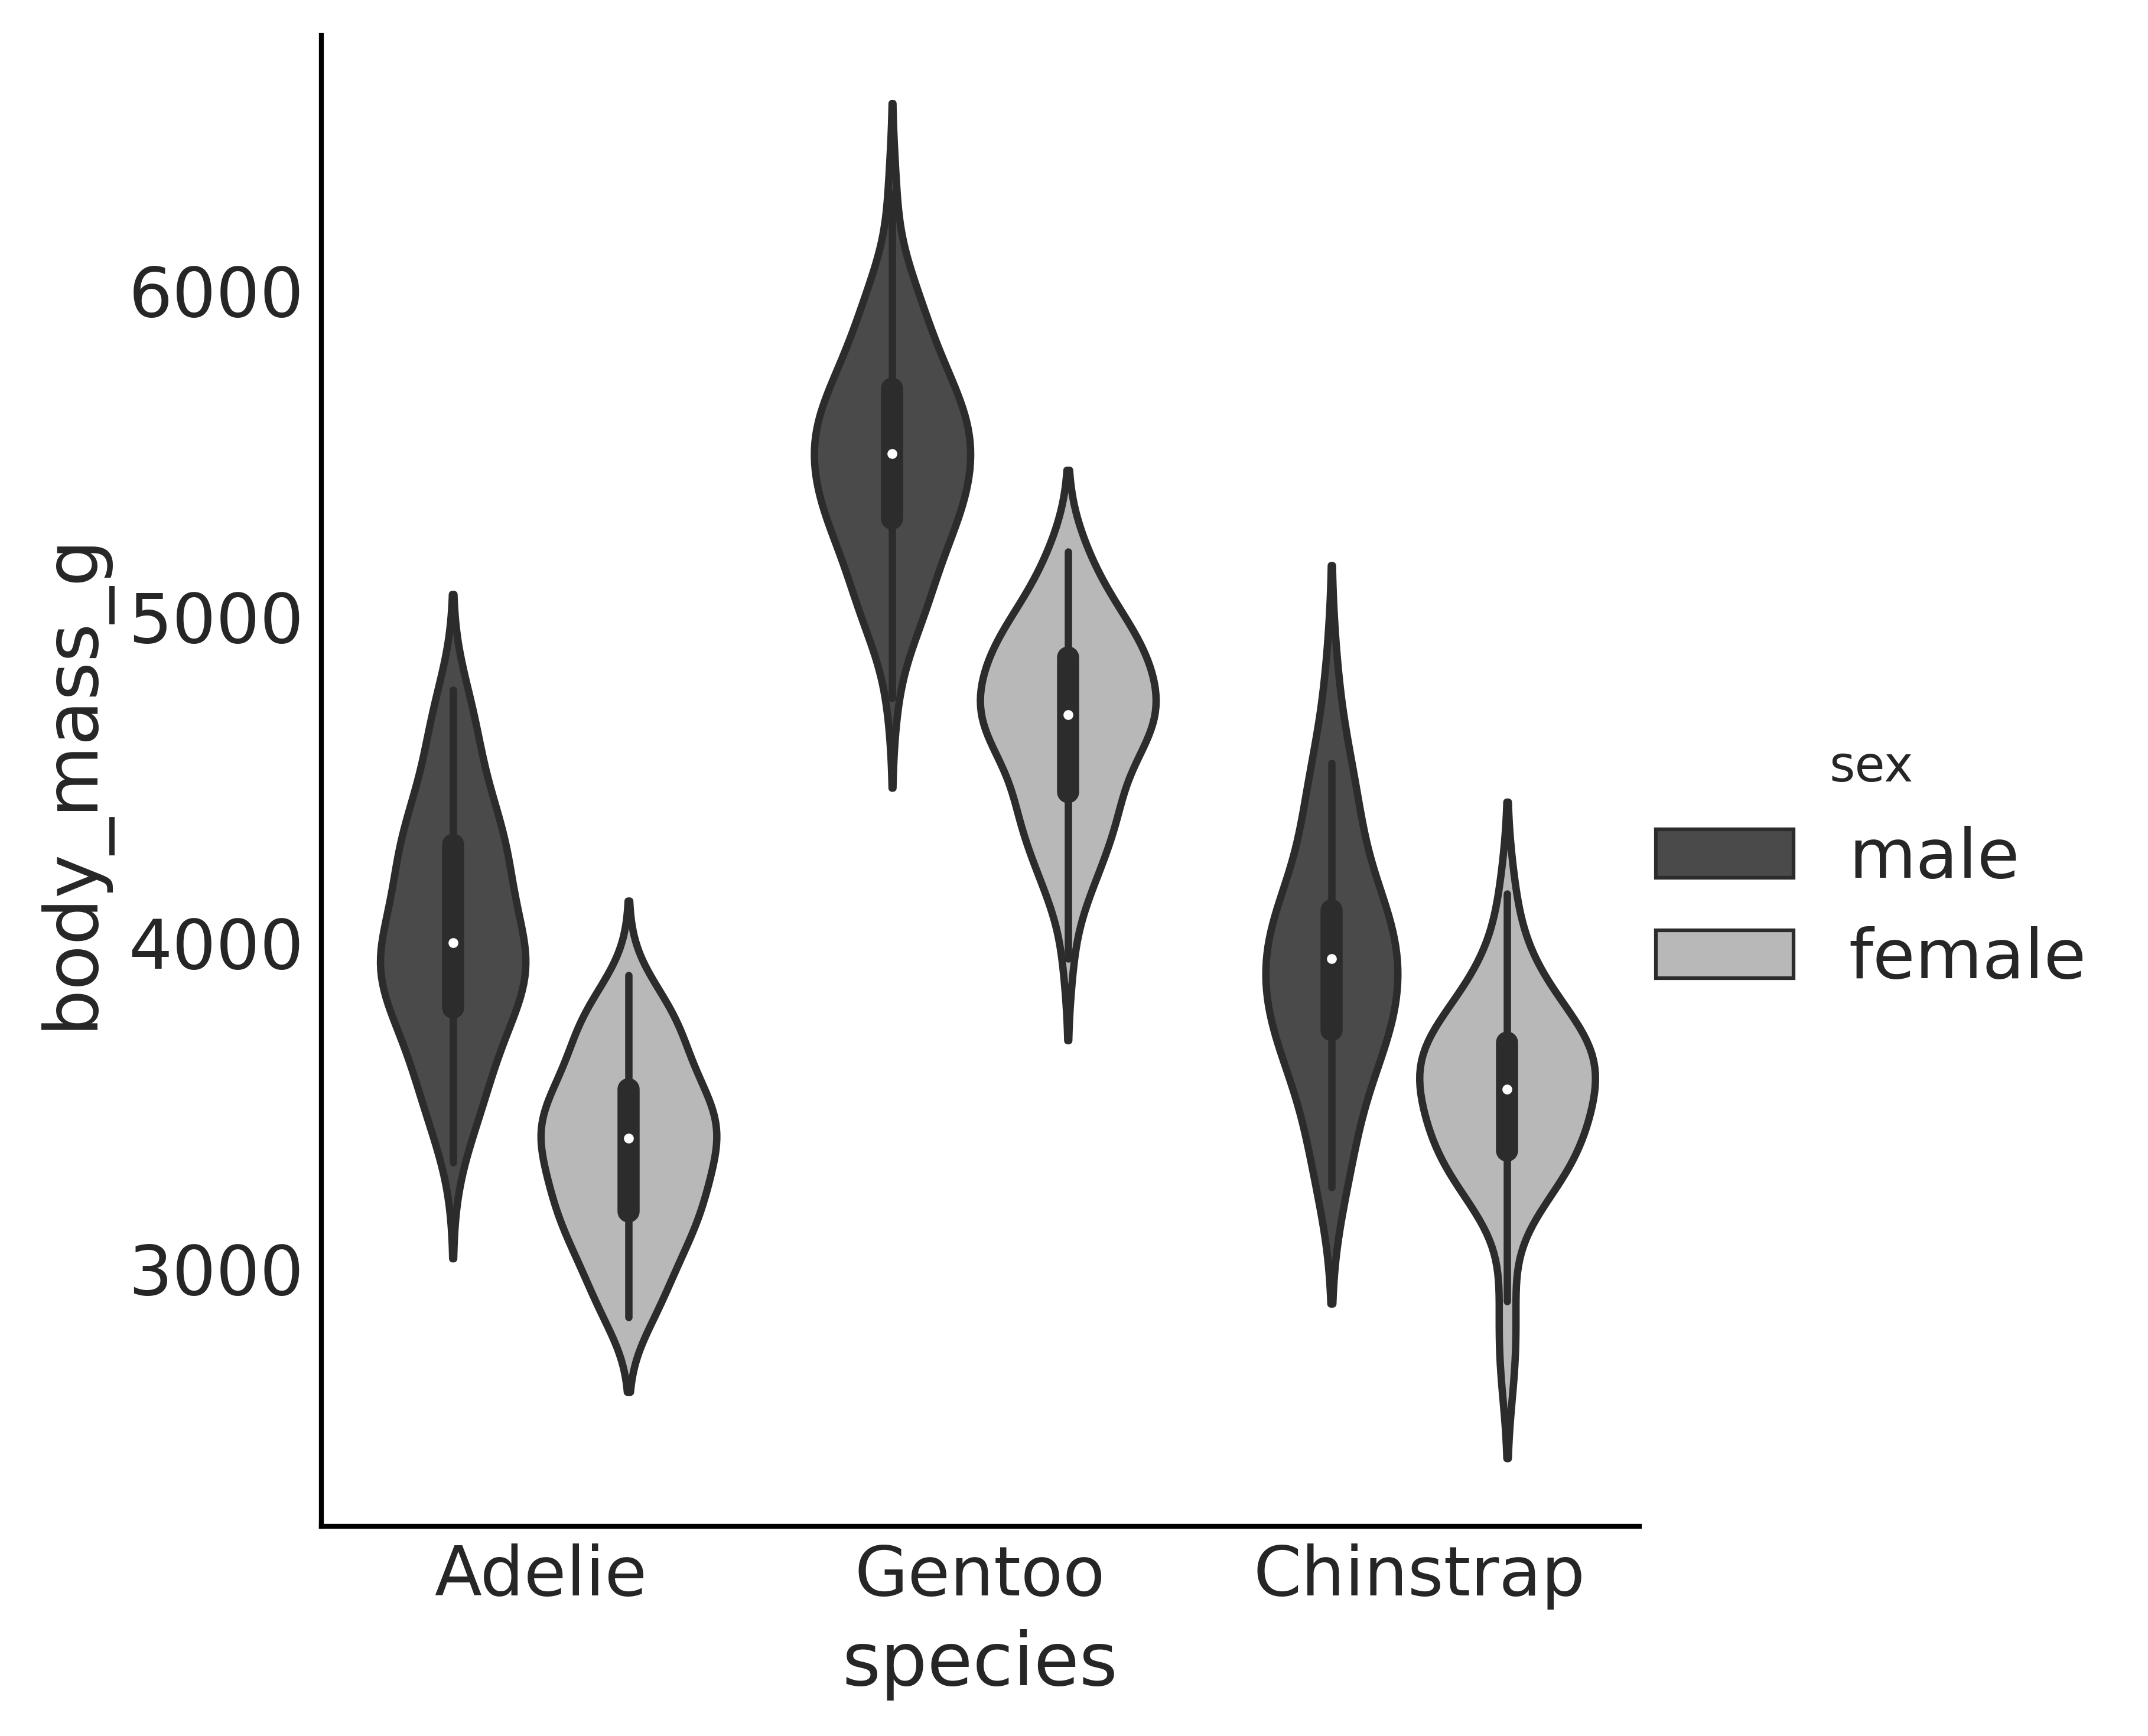

In [7]:
palette = {'male': 'C1', 'female': 'C3'}  
sns.catplot(df, x="species", y="body_mass_g", hue="sex", kind="violin", palette=palette);

## Relazioni tra variabili

Calcoliamo la correlazione tra le variabili.

In [8]:
vars = ["bill_length_mm", "bill_depth_mm", "flipper_length_mm", "body_mass_g"]
corr_matrix = df[vars].corr().round(2)
corr_matrix

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g
bill_length_mm,1.00,-0.24,0.66,0.60
bill_depth_mm,-0.24,1.00,-0.58,-0.47
flipper_length_mm,0.66,-0.58,1.00,0.87
body_mass_g,0.60,-0.47,0.87,1.00


Queste informazioni possono essere comunicate in forma più diretta se usiamo una rappresentazione grafica.

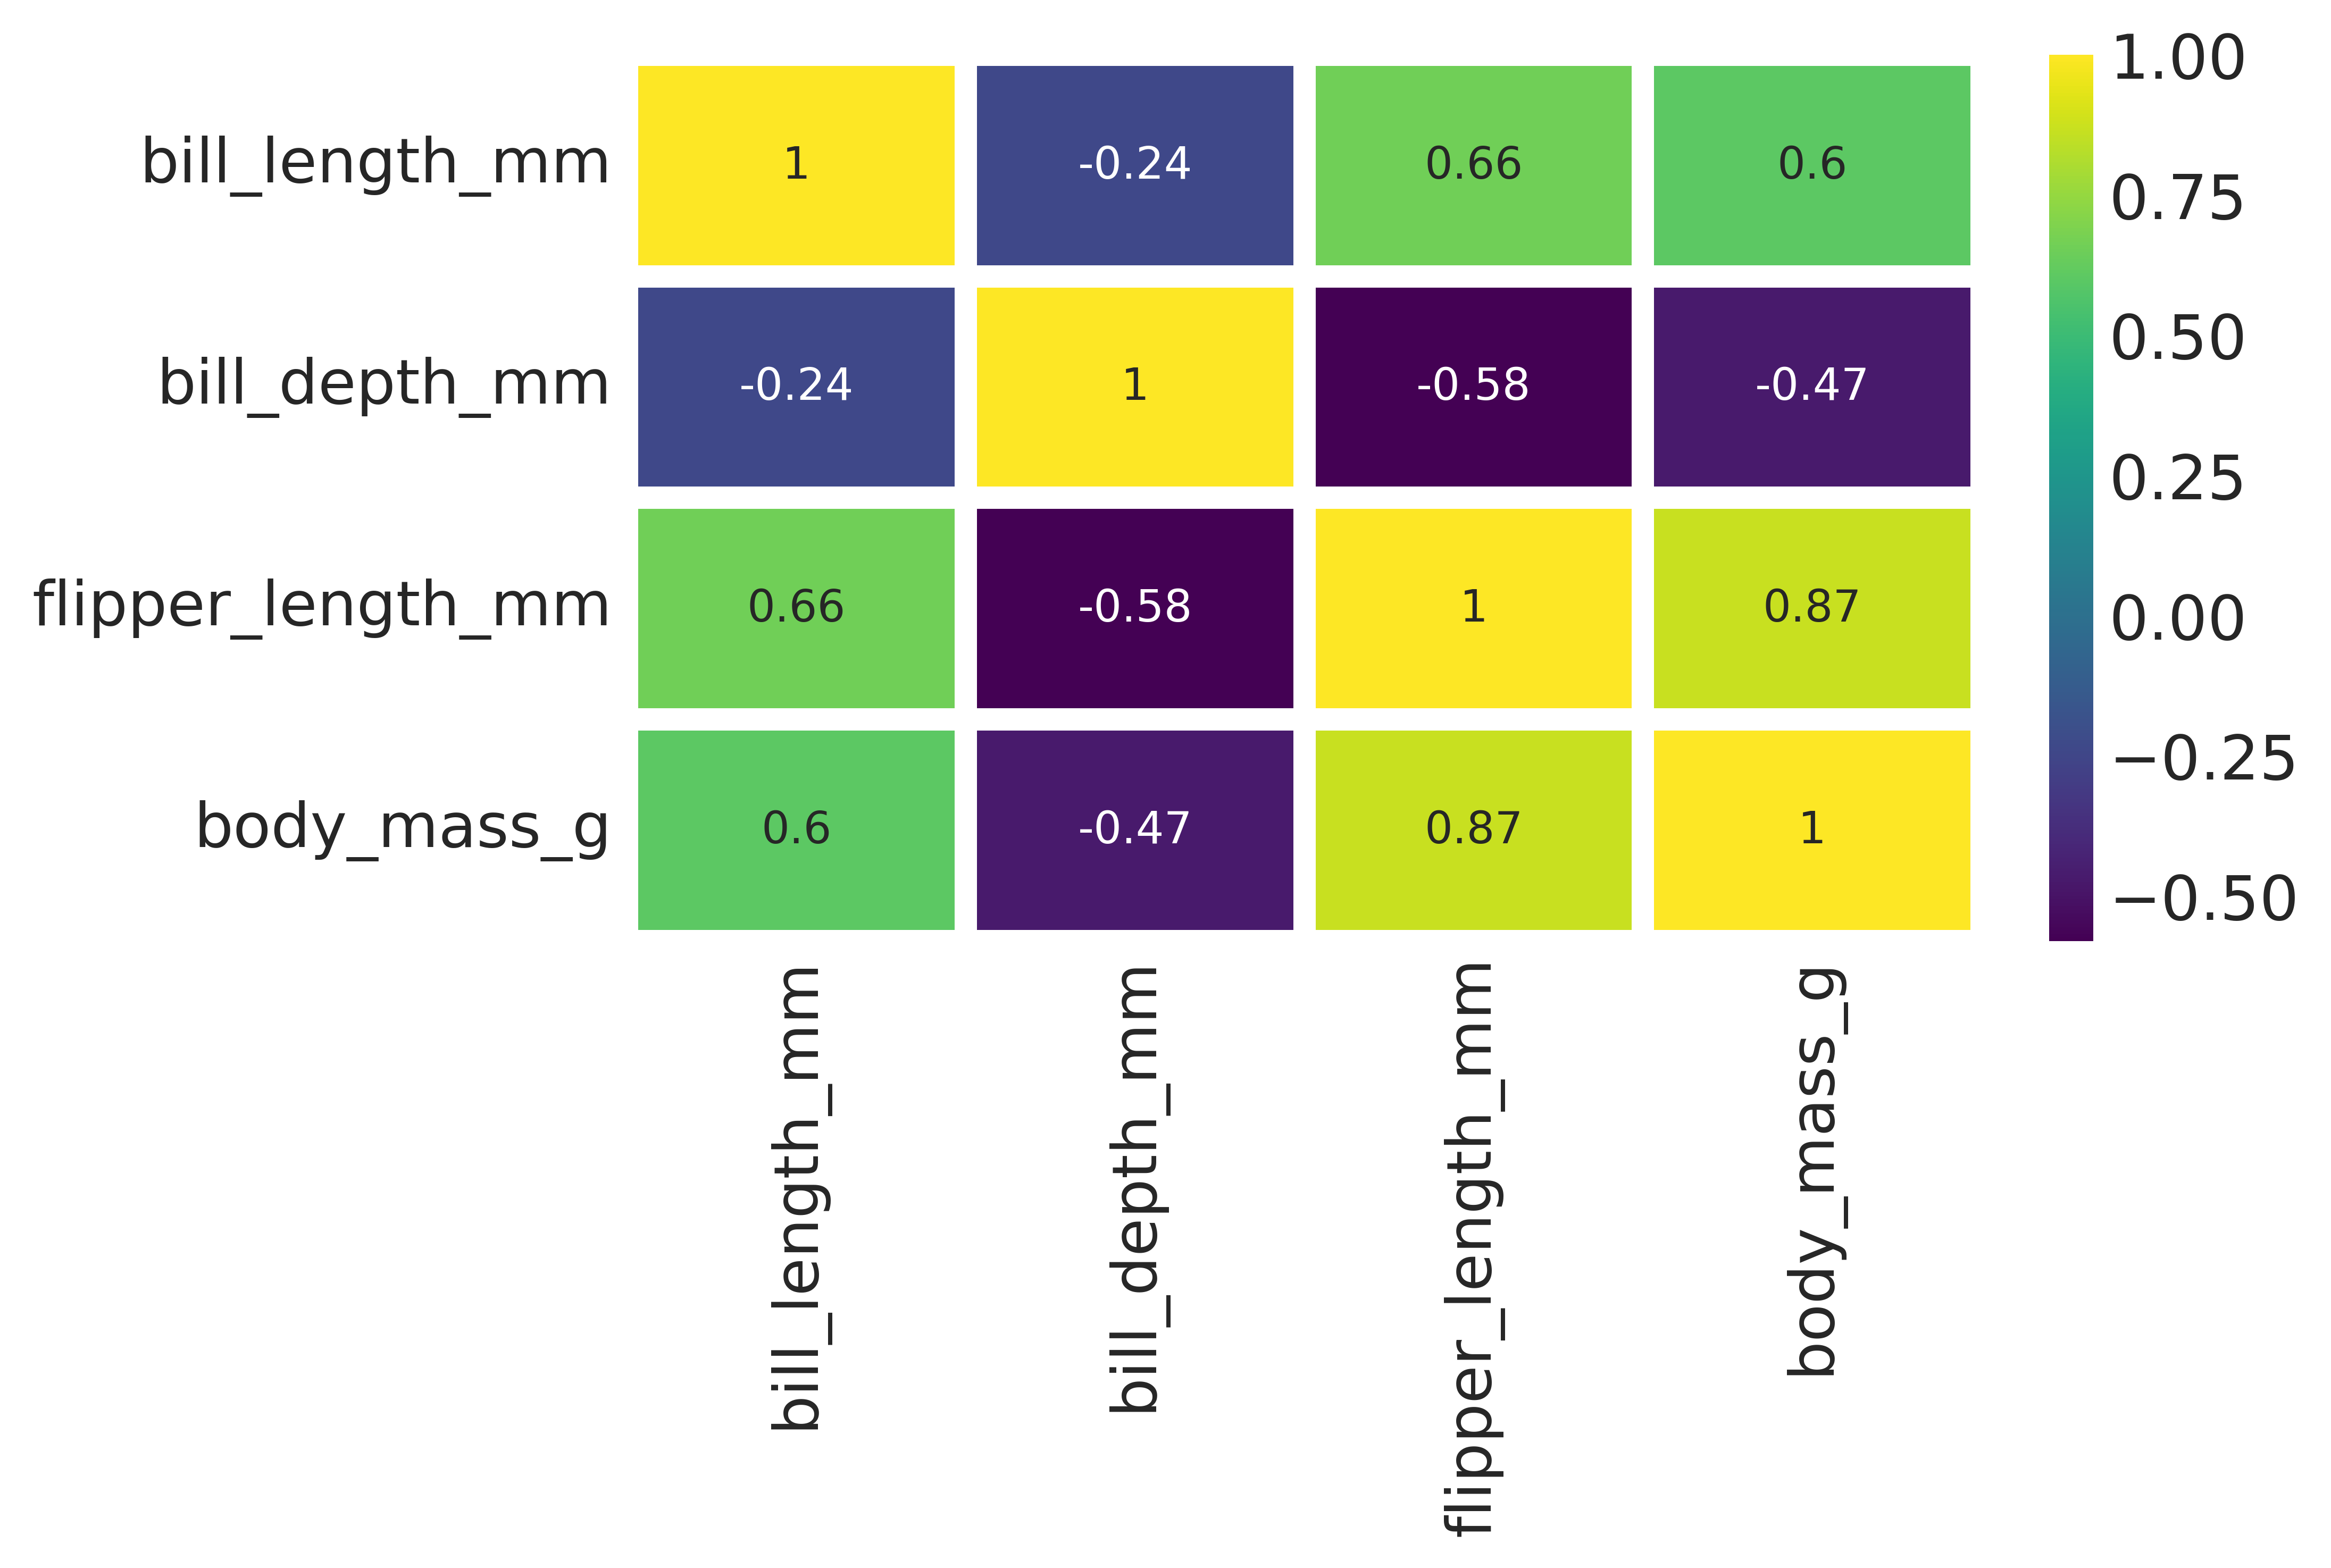

In [9]:
sns.heatmap(corr_matrix, annot=True, linecolor="white", linewidths=5, cmap='viridis');

La lunghezza della pinna e la massa corporea mostrano un forte legame, con una correlazione di 0.87. Ciò indica che i pinguini con pinne più lunghe tendono a pesare di più.

Di seguito è riportato un esempio di diagramma a dispersione che illustra questa relazione.

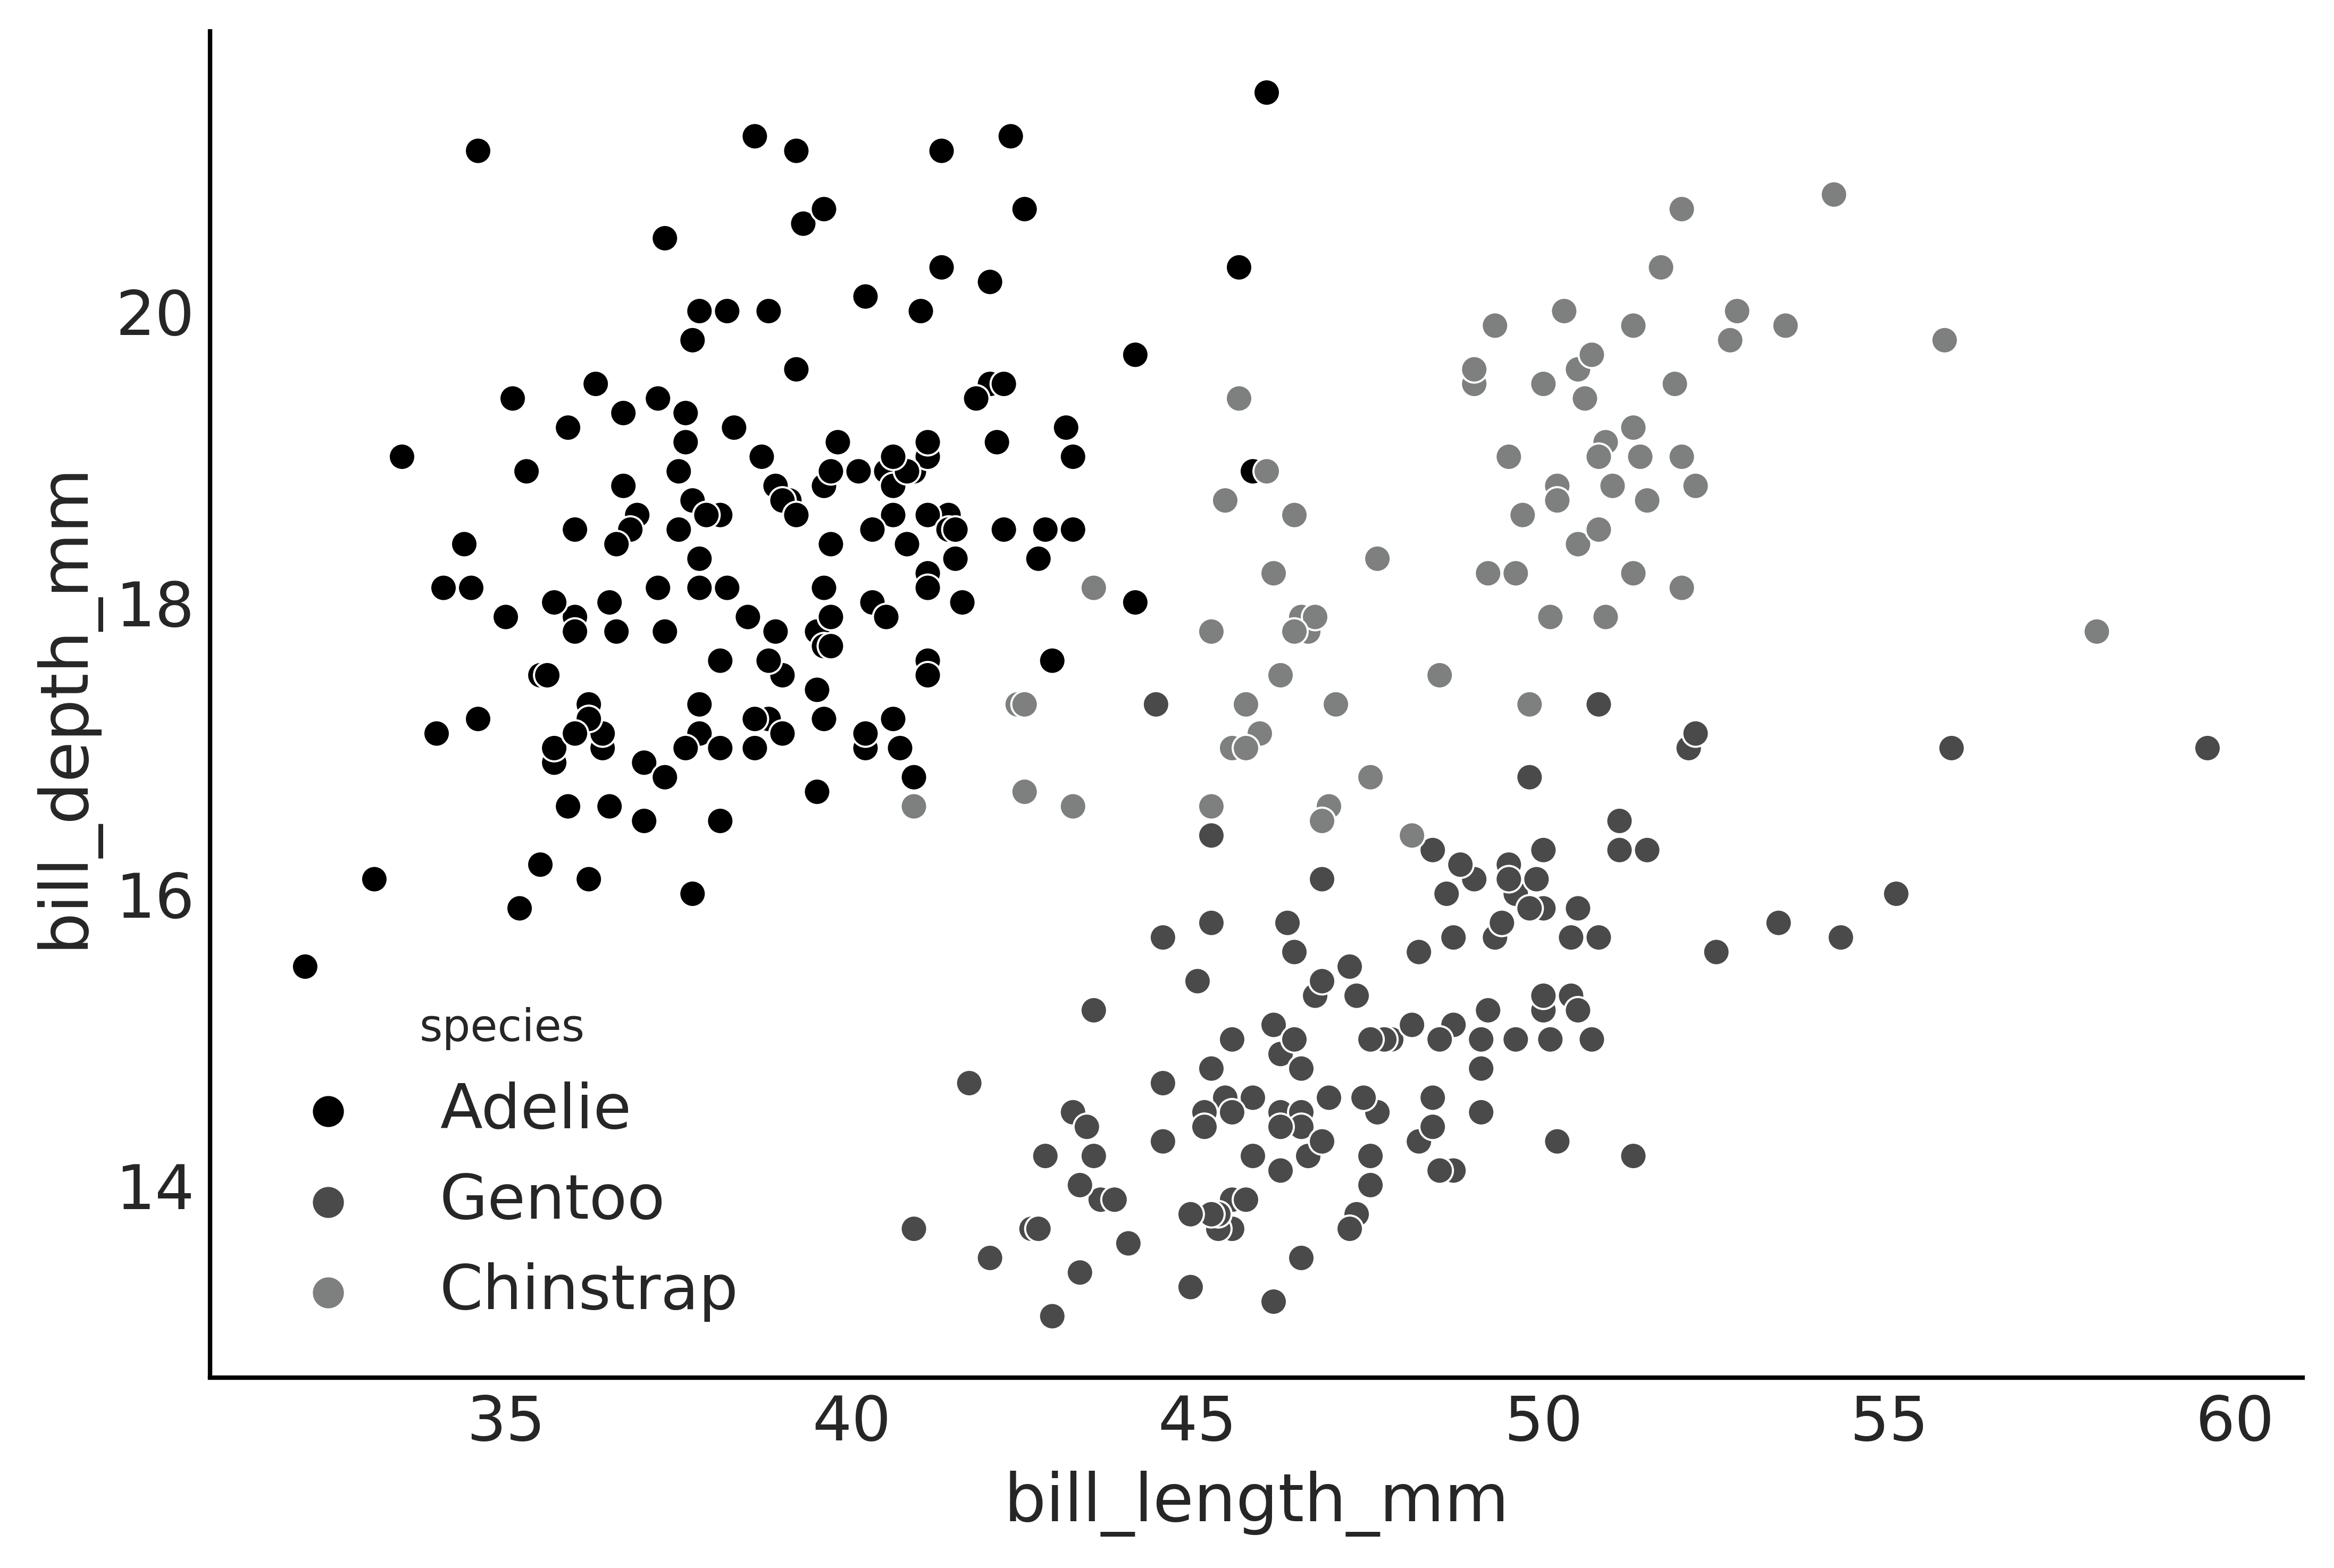

In [10]:
sns.scatterplot(df, x="bill_length_mm", y="bill_depth_mm", hue="species");

Evidentemente, le osservazioni delle tre specie formano cluster distinti. Per ciascuna specie, la lunghezza e la larghezza del becco presentano un intervallo specifico.

Spesso è vantaggioso creare grafici separati in base a diverse dimensioni dei dati; nell'esempio seguente, suddividiamo i dati in base all'isola di appartenenza.

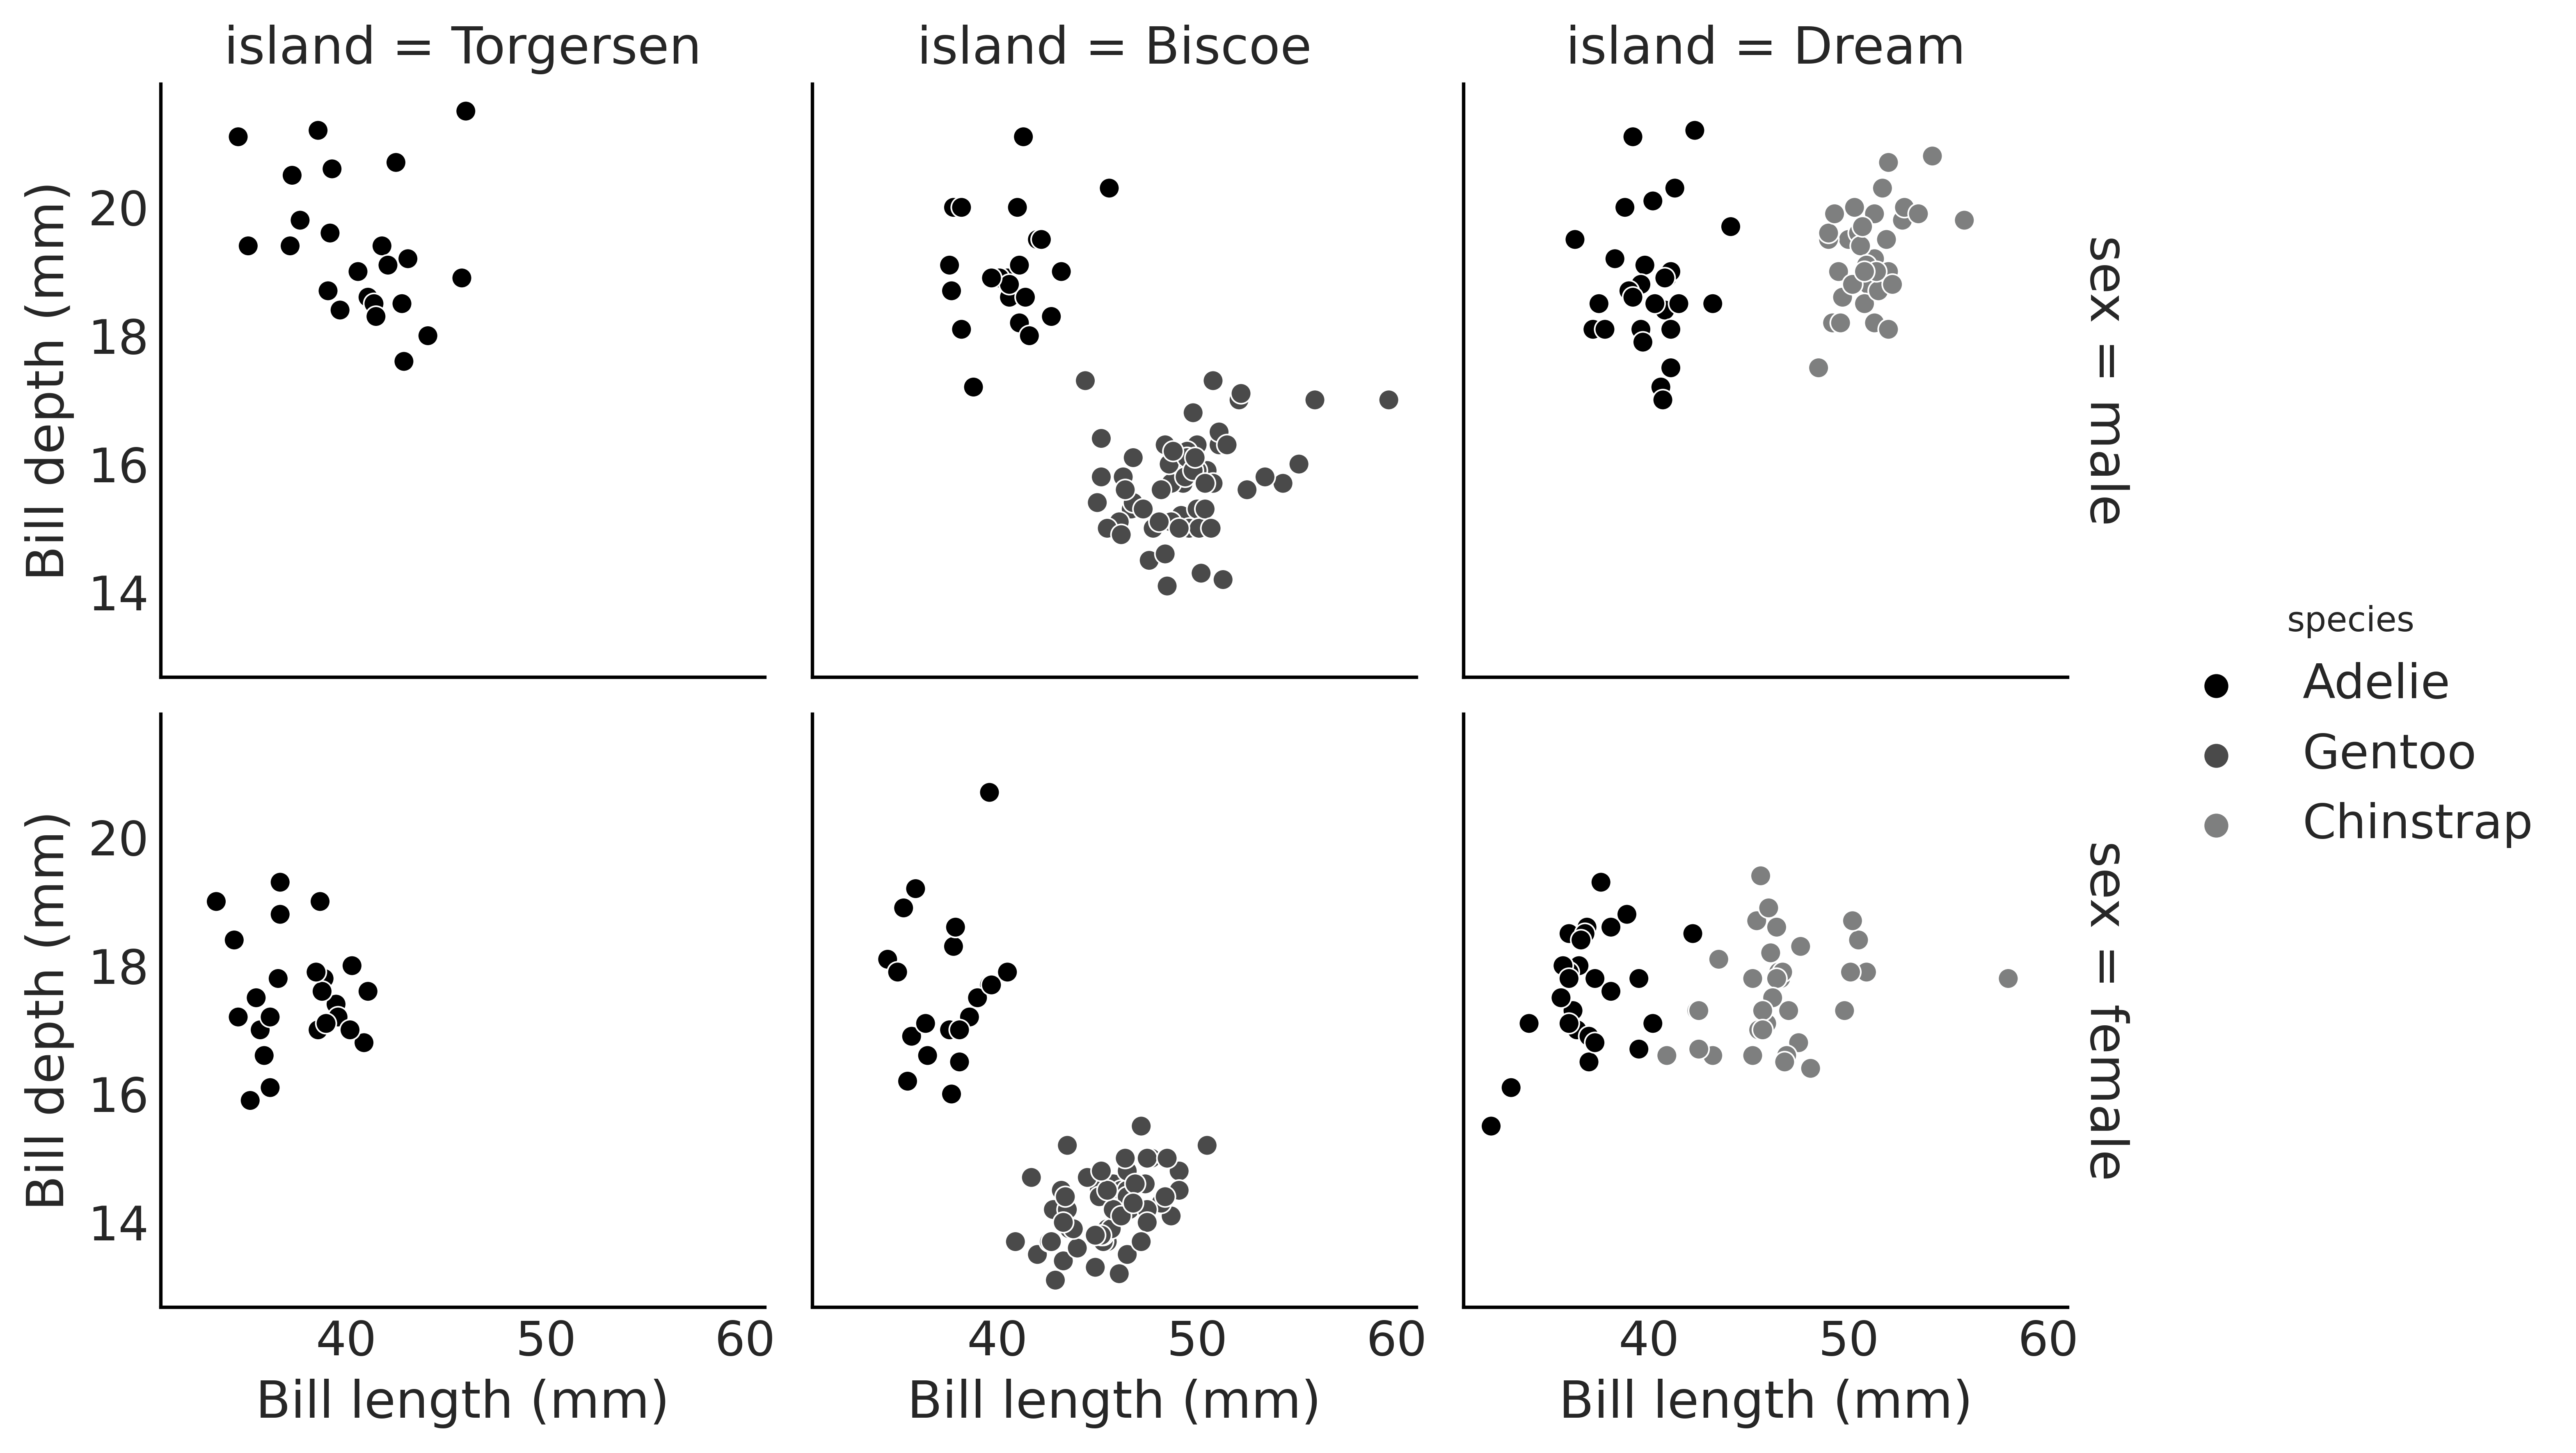

In [11]:
g = sns.relplot(
    data=df,
    x="bill_length_mm",
    y="bill_depth_mm",
    hue="species",
    row="sex",
    col="island",
    height=3,
    facet_kws=dict(margin_titles=True),
)
g.set_axis_labels(
    "Bill length (mm)",
    "Bill depth (mm)",
);

## Watermark

In [12]:
%load_ext watermark
%watermark -n -u -v -iv -p seaborn

Last updated: Sun Sep 17 2023

Python implementation: CPython
Python version       : 3.11.5
IPython version      : 8.15.0

seaborn: 0.12.2

matplotlib: 3.7.2
arviz     : 0.16.0
seaborn   : 0.12.2
pandas    : 2.0.3
numpy     : 1.25.2

